### Algorithme des $k$-moyennes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


On donne la fonction suivante :

In [2]:
def generate(n,mx,sx,my,sy,alpha):
    X = np.random.randn(n*2).reshape((n,2))
    X = X*np.array([sx,sy])
    r = np.array([[np.cos(alpha), -np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]])
    X = X@r
    X = X+np.array([mx,my])
    return X

Interprétez son code. 

Testez-là en visualisant le nuage de points qu'elle produit en faisant varier ses paramètres.

Déduisez-en le rôle des paramètres.

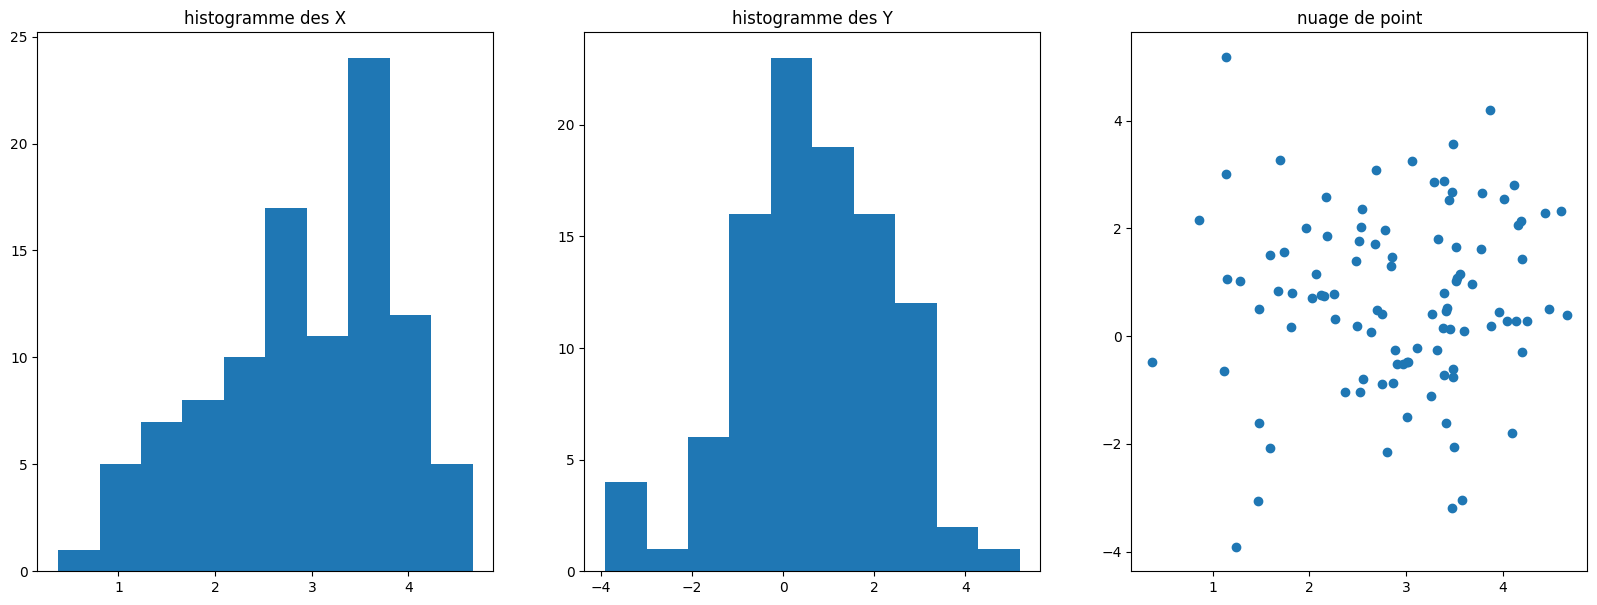

In [3]:
# Utilisez cette cellule pour tester l'exécution de la fonction generate
points = generate(100, 3, 1, .5, 1.5, 0)


plt.figure(figsize=(20, 7))
plt.subplot(131)
plt.title("histogramme des X")
plt.hist(x=points[:, 0])

plt.subplot(132)
plt.title("histogramme des Y")
plt.hist(x=points[:, 1])

plt.subplot(133)
plt.title("nuage de point")
plt.scatter(x=points[:,0], y=points[:,1])

Effet de l'angle

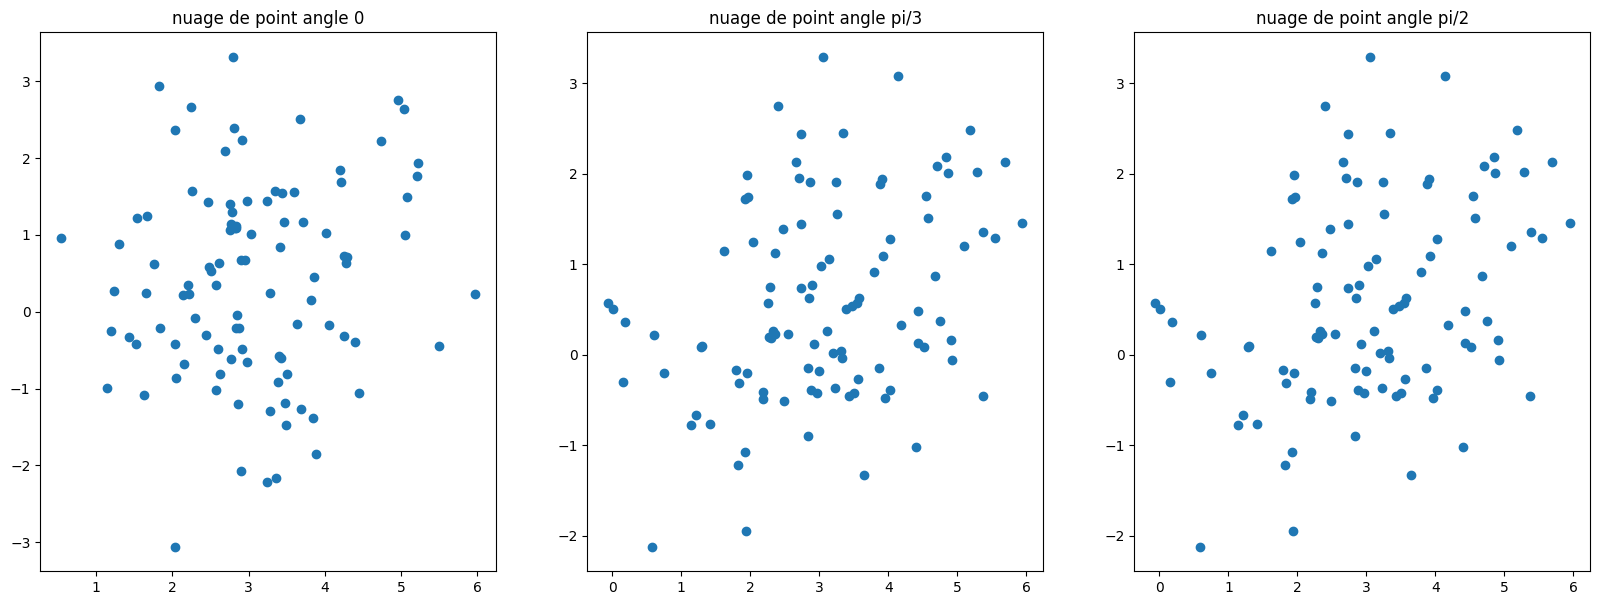

In [4]:


points_0 = generate(100, 3, 1, .5, 1.5, 0)
points_1 = generate(100, 3, 1, .5, 1.5, np.pi/3)

points_2 = generate(100, 3, 1, .5, 1.5, np.pi/2)

plt.figure(figsize=(20, 7))

plt.subplot(131)
plt.title("nuage de point angle 0")
plt.scatter(x=points_0[:,0], y=points_0[:,1])

plt.subplot(132)
plt.title("nuage de point angle pi/3" )
plt.scatter(x=points_1[:,0], y=points_1[:,1])

plt.subplot(133)
plt.title("nuage de point angle pi/2" )
plt.scatter(x=points_1[:,0], y=points_1[:,1])


Dans cette cellule, expliquez le fonctionnement de la fonction `generate` et indiquez la signification de ses paramètres.

## Constitution d'un jeu de données

In [46]:
X1 = generate(30,0,1.5,7,1,np.pi/3)
X2 = generate(30,-5,1,-4,.4,-np.pi/4)
X3 = generate(30,7,1,-1,.8,np.pi/4)

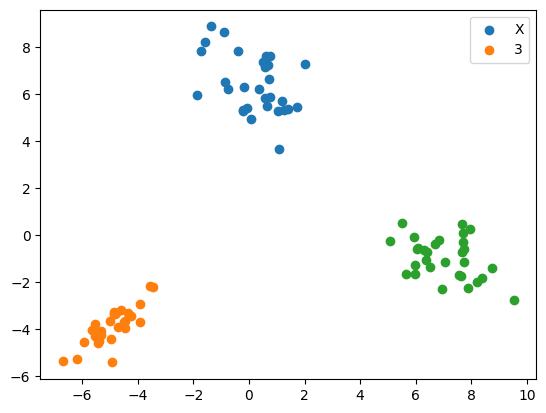

In [47]:
plt.figure()
plt.legend("X1")
plt.scatter(X1[:,0],X1[:,1])
plt.legend("X2")
plt.scatter(X2[:,0],X2[:,1])
plt.legend("X3")
plt.scatter(X3[:,0],X3[:,1])

Constituez un dataframe pandas disposant de deux colonnes 'x' et 'y' constitué des valeurs de `X1`, `X2` et `X3` dont l'ordre sera aléatoire.

Vous utiliserez les fonctions `numpy.concatenate` et `np.random.shuffle`

In [48]:
X = np.concatenate([X1, X2, X3])
np.random.shuffle(X)
print(X)

[[-5.62893841 -4.02524197]
 [ 8.72739054 -1.37805416]
 [ 5.50373232  0.52333738]
 [ 0.36840215  6.23976854]
 [-5.53028746 -3.76820585]
 [-1.36241867  8.88924701]
 [ 0.64895072  5.490818  ]
 [ 6.35411535 -1.04710347]
 [ 1.74056523  5.46225363]
 [-4.84602222 -3.34127249]
 [-4.97630955 -3.66721397]
 [-5.39834188 -4.5126412 ]
 [-0.19789338  5.3289738 ]
 [ 0.56845518  7.17060458]
 [ 0.61951101  7.65071482]
 [ 0.7474992   5.86904816]
 [-4.22747678 -3.42631775]
 [-4.93499254 -5.41283844]
 [-3.5720671  -2.17212404]
 [ 6.49263945 -1.33808574]
 [-3.43752968 -2.21094479]
 [ 9.51837491 -2.73591913]
 [-4.4962487  -3.7008905 ]
 [ 5.0670353  -0.24863244]
 [ 6.2902826  -0.62895523]
 [ 6.93948446 -2.29544063]
 [ 0.0780507   4.9441873 ]
 [-1.87423253  5.96515135]
 [ 7.93938869  0.27485371]
 [ 6.07255093 -0.55868545]
 [ 6.83275836 -0.21660836]
 [-4.85001419 -3.25961495]
 [ 1.4026256   5.35541363]
 [-5.32506875 -4.23705366]
 [-0.16547797  6.33388153]
 [ 0.48965814  7.35732527]
 [ 7.89198472 -2.23885893]
 

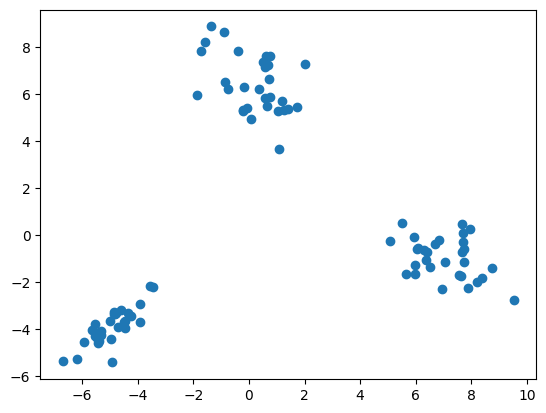

In [49]:
plt.scatter(X[:, 0], X[:, 1])

In [50]:
df = pd.DataFrame(data=X, columns=["X", "Y"])
df

,X,Y
0,-5.628938,-4.025242
1,8.727391,-1.378054
2,5.503732,0.523337
3,0.368402,6.239769
4,-5.530287,-3.768206
...,...,...
85,-0.399208,7.829626
86,-0.851046,6.512733
87,1.067296,3.678786
88,7.714374,0.088795


Ajoutez une colonne `cluster` à votre dataframe dont la valeur sera initialisée aléatoirement par un entier compris entre 0 inclus et k exclus, k étant un paramètre.

In [77]:
df["cluster"] = np.random.randint(0, 3, len(df))
df

,X,Y,cluster,new_cluster
0,-5.628938,-4.025242,0,0
1,8.727391,-1.378054,1,2
2,5.503732,0.523337,2,2
3,0.368402,6.239769,2,2
4,-5.530287,-3.768206,1,0
...,...,...,...,...
85,-0.399208,7.829626,2,2
86,-0.851046,6.512733,2,2
87,1.067296,3.678786,0,2
88,7.714374,0.088795,2,2


Générez le dictionnaire `means` dont les clés seront les valeurs de 0 à k exclus et dont les valeurs seront les moyennes des colonnes `x` et `y` pour les données du dataframe dont la valeur de `cluster` sera celle de la clé.

In [92]:
def compute_mean(df, feature=["X", "Y"], class_column="cluster"):
    mean_df = df.groupby(class_column).mean()
    means = {i : tuple(mean_df[feature].iloc[i]) for i in range(len(mean_df))}
    return means

means = compute_mean(df)
means

{0: (0.4389817357554904, -0.6402764641135773),
 1: (0.0689656043493795, 0.2707507811721639),
 2: (1.5805628509871452, 1.8007413216959014)}

Implantez une fonction calculant la distance euclidienne entre deux points

In [57]:

def dist(p1, p2):
    return np.sqrt(np.sum(p1-p2)**2)


Implantez une fonction qui pour un point donné, retourne la clé associée à la moyenne la plus proche

In [61]:
def get_near_mean(p, means=means):
    distances = [dist(p , np.array(means[i])) for i in means]
    return np.argmin(distances)

def get_near_means(s):
    return np.apply_along_axis(get_near_mean, axis=1, arr=s)



Initialisez une nouvelle colonne `new_cluster` dont la valeur sera l'indice de la moyenne la plus proche pour chaque point.

In [63]:
df["new_cluster"] = df[["X", "Y"]].apply(get_near_mean, args=(means,), axis=1)

In [64]:
df

,X,Y,cluster,new_cluster
0,-5.628938,-4.025242,0,0
1,8.727391,-1.378054,2,2
2,5.503732,0.523337,0,2
3,0.368402,6.239769,0,2
4,-5.530287,-3.768206,1,0
...,...,...,...,...
85,-0.399208,7.829626,2,2
86,-0.851046,6.512733,1,2
87,1.067296,3.678786,2,2
88,7.714374,0.088795,2,2


Finalement, implantez l'algorithme des $k$-moyennes en itérant tant que la colonne `new_cluster` est différente de la colonne `cluster`, cette dernière étant mise à jour à chaque itération.

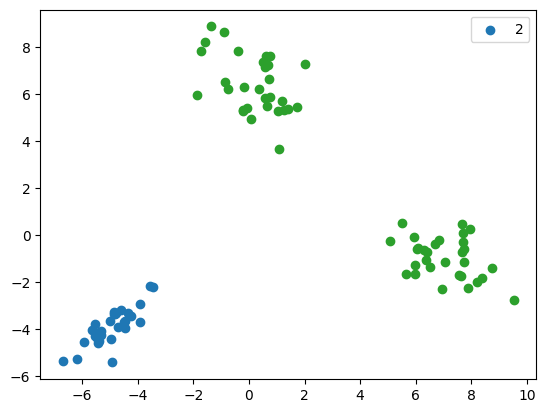

In [67]:
while (df["cluster"]-df["new_cluster"]).sum()!= 0:
    df["cluster"] = df["new_cluster"]
    means = compute_mean(df)
    df["new_cluster"] = df[["X", "Y"]].apply(get_near_mean, args=(means,), axis=1)

class0 = df[df["cluster"] == 0.0 ]
class1 = df[df["cluster"] == 1.0 ]
class2 = df[df["cluster"] == 2.0 ]

plt.figure()
plt.legend("0")
plt.scatter(class0["X"],class0["Y"])
plt.legend("1")
plt.scatter(class1["X"],class1["Y"])
plt.legend("2")
plt.scatter(class2["X"],class2["Y"])

Visualisez le partitionnement réalisé. 

Faites varier les valeurs de $k$.

Appliquez sur d'autres jeux de données que vous génèrerez.

In [93]:
def fit_kmean(df, k, feature=["X", "Y"], class_column = "cluster",new_class_column = "new_cluster"):
    
    df[class_column] = np.random.randint(0, k, len(df))
    means = compute_mean(df)

    while (df[class_column]-df[new_class_column]).sum()!= 0:
        df[class_column] = df[new_class_column]
        means = compute_mean(df, feature)
        df[new_class_column] = df[class_column].apply(get_near_mean, args=(means,), axis=1)

   

    plt.figure()
    for i in range(k):
        feature = df[df[class_column] ==  i][[class_column]]
        feature = feature.to_numpy()
        plt.scatter(feature[:, 0],feature[:, 1], label=f"{i}")

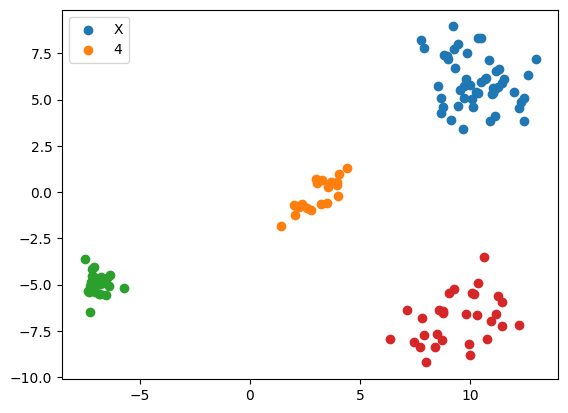

In [83]:
X1 = generate(50,10,1.5,6,1,np.pi/3)
X2 = generate(20,3 ,1.2,0,.4,-np.pi/4)
X3 = generate(25,-7,0.7,-5,.8,np.pi/4)
X4 = generate(30,10,1.7,-7,1.5,np.pi/4)

plt.figure()
plt.legend("X1")
plt.scatter(X1[:,0],X1[:,1])
plt.legend("X2")
plt.scatter(X2[:,0],X2[:,1])
plt.legend("X3")
plt.scatter(X3[:,0],X3[:,1])

plt.legend("X4")
plt.scatter(X4[:,0],X4[:,1])

In [85]:
X = np.concatenate([X1, X2, X3, X4])
ndf = pd.DataFrame(data=X)

data_feature = ["Longueur", "Largeur"]
ndf.columns = data_feature

ndf

,Longueur,Largeur
0,11.537634,6.104260
1,11.182535,6.566630
2,8.958268,7.383125
3,10.485630,5.961991
4,12.472778,3.834474
...,...,...
120,10.765337,-7.955628
121,11.452809,-7.242727
122,9.942493,-8.212222
123,10.655479,-3.513871


In [94]:
fit_kmean(ndf,4, feature=data_feature)

KeyError: "None of [Index(['X', 'Y'], dtype='object')] are in the [columns]"

In [ ]:
fit_kmean(ndf,3, feature=data_feature)

Définissez une fonction qui calcule la somme des distances intra-clusters.